## SHUBHAM SINGH 21BAI1070 PAT 2

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
data = pd.read_csv('bank.csv', delimiter=';')


In [85]:
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


#    1. Print the shape of our dataset

In [86]:
data.shape

(4521, 17)

#    2. Train a dataset with missing values,

In [87]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#    3. Create a new variable holding our categorical data and iterate through it to get the value count of each categorical data column.



In [88]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create a new variable holding the categorical data
categorical_data = data[categorical_columns]

# Iterate through the categorical data columns and get value counts
for column in categorical_data:
    value_counts = categorical_data[column].value_counts()
    print(f"Value counts for {column}:")
    print(value_counts)
    print()

Value counts for job:
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Value counts for marital:
married     2797
single      1196
divorced     528
Name: marital, dtype: int64

Value counts for education:
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

Value counts for default:
no     4445
yes      76
Name: default, dtype: int64

Value counts for housing:
yes    2559
no     1962
Name: housing, dtype: int64

Value counts for loan:
no     3830
yes     691
Name: loan, dtype: int64

Value counts for contact:
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

Value counts for month:
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct 


#    5. Check any NULL value in the dataset.



In [89]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#    7. Split Dataset for Training and Testing in the ratio of 70% and 30% respectively   Print the column names of train and test.


In [90]:
X = data.drop('y', axis=1)
y = data['y']
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)


In [91]:
print("Train column names:", train_data.columns)
print("Test column names:", test_data.columns)

Train column names: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Test column names: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


#    4. Find the classes for the features in test dataset. Does it match the train dataset?



In [92]:
train_classes = train_data['y'].unique()

# Get the classes for features in test dataset
test_classes = test_data['y'].unique()

print("Classes in train dataset:", train_classes)
print("Classes in test dataset:", test_classes)

# Check if the classes match
classes_match = all(elem in train_classes for elem in test_classes)

if classes_match:
    print("The classes in the test dataset match the train dataset.")
else:
    print("The classes in the test dataset do not match the train dataset.")


Classes in train dataset: ['no' 'yes']
Classes in test dataset: ['no' 'yes']
The classes in the test dataset match the train dataset.




#    6. Check if train and test have missing values.




In [93]:
train_missing_values = train_data.isnull().sum()
test_missing_values = test_data.isnull().sum()

print("Train missing values:\n", train_missing_values)
print("Test missing values:\n", test_missing_values)

Train missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Test missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64





#    8. Draw a bar chart w.r.t job type of the customer.


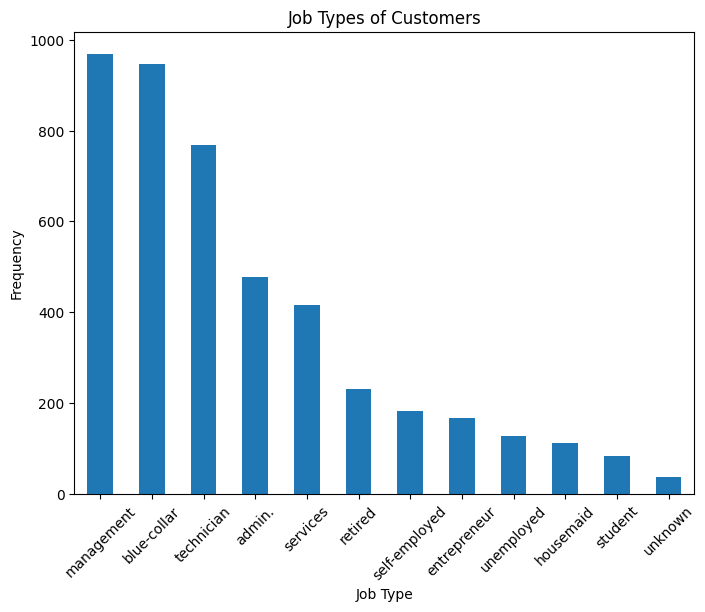

In [94]:
# Count the frequency of each job type
job_counts = data['job'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
job_counts.plot(kind='bar')
plt.title('Job Types of Customers')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




#    9. Print summary statistics of training dataset.




In [95]:
summary_stats = train_data.describe()
print(summary_stats)

               age       balance          day     duration     campaign  \
count  3164.000000   3164.000000  3164.000000  3164.000000  3164.000000   
mean     41.230721   1396.830910    16.038243   262.766435     2.886536   
std      10.687312   2733.299691     8.200121   254.304079     3.349032   
min      19.000000  -1746.000000     1.000000     5.000000     1.000000   
25%      33.000000     70.000000     9.000000   103.750000     1.000000   
50%      39.000000    449.000000    16.000000   184.500000     2.000000   
75%      49.000000   1518.250000    21.000000   332.000000     3.000000   
max      87.000000  27359.000000    31.000000  2769.000000    50.000000   

             pdays     previous  
count  3164.000000  3164.000000  
mean     38.652971     0.541087  
std      97.631248     1.712469  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    24.000000  



#    10. Find correlation between age and deposit in train dataset.







In [96]:
data['deposit'] = data['y'].map({'no': 0, 'yes': 1})
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
correlation = train_data['age'].corr(train_data['deposit'])
print("Correlation between age and y:", correlation)


Correlation between age and y: 0.053342413776559384


#    11. Draw the Scatter and density plots.

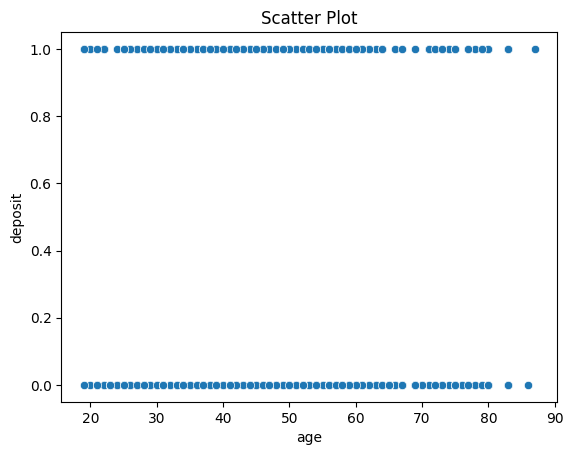

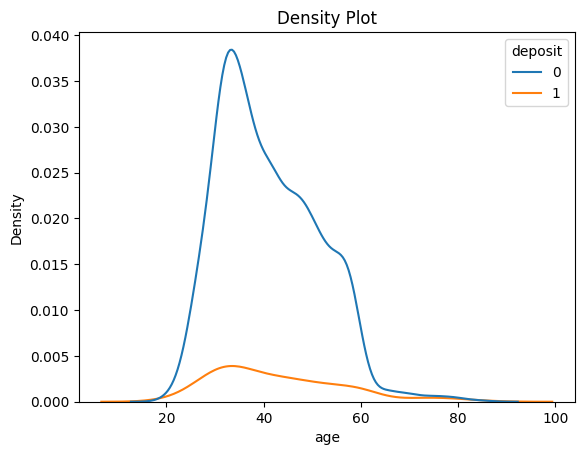

In [97]:
sns.scatterplot(data=train_data, x='age', y='deposit')
plt.title('Scatter Plot')
plt.show()

sns.kdeplot(data=train_data, x='age', hue='deposit')
plt.title('Density Plot')
plt.show()



#    12. Construct the Correlation matrix for the given dataset.




In [98]:
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894   
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437   
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352   
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380   
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137   
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000   
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562   
deposit   0.045092  0.017905 -0.011244  0.401118 -0.061147  0.104087   

          previous   deposit  
age      -0.003511  0.045092  
balance   0.026196  0.017905  
day      -0.059114 -0.011244  
duration  0.018080  0.401118  
campaign -0.067833 -0.061147  
pdays     0.577562  0.104087  
previous  1.000000  0.116714  
deposit   0.116714  1.000000  


<ipython-input-98-f6724552d986>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()



#    13. Build a function to show categorical values distribution.


In [99]:
def plot_categorical_distribution(data, column):
    value_counts = data[column].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Distribution of ' + column)
    plt.show()

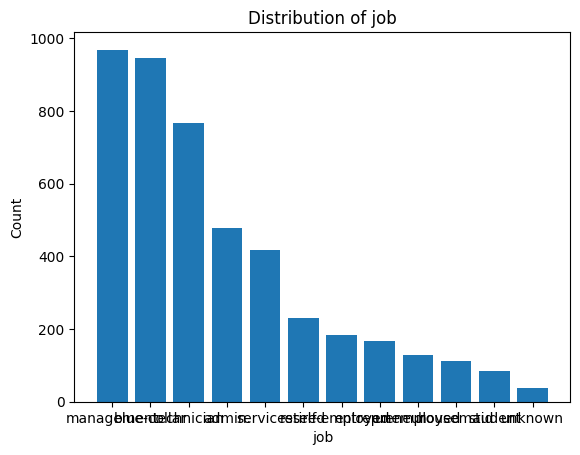

In [100]:
plot_categorical_distribution(data, 'job')





#    14. Plot the confusion matrix.




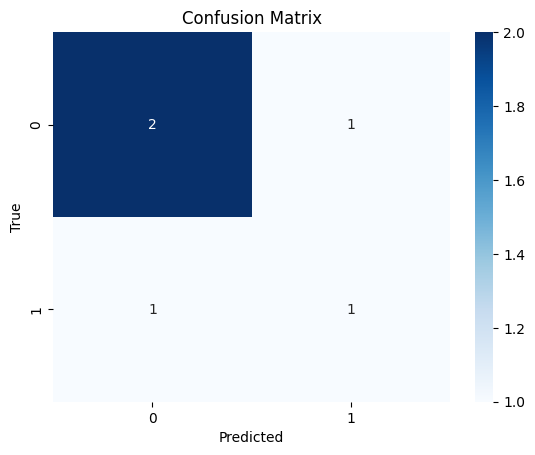

In [101]:
# Assuming you have the true labels and predicted labels stored in variables
true_labels = [0, 1, 0, 1, 0]
predicted_labels = [0, 0, 1, 1, 0]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 15. Get performance metrics

In [102]:
true_labels = [0, 1, 0, 1, 0]
predicted_labels = [0, 0, 1, 1, 0]

# Calculate the classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



# 16. Calculate catrgorical means for other categoriacal variables such aas seducation and matrial status ot get a more deatailed sense of our data




In [103]:
data['deposit'] = data['y'].map({'no': 0, 'yes': 1})
# Calculate the categorical means for education
education_means = data.groupby('education')['deposit'].mean()
# Calculate the categorical means for marital status
marital_means = data.groupby('marital')['deposit'].mean()
# Print the categorical means
print("Categorical Means for Education:")
print(education_means)

print("\nCategorical Means for Marital Status:")
print(marital_means)


Categorical Means for Education:
education
primary      0.094395
secondary    0.106245
tertiary     0.142963
unknown      0.101604
Name: deposit, dtype: float64

Categorical Means for Marital Status:
marital
divorced    0.145833
married     0.099035
single      0.139632
Name: deposit, dtype: float64



#    17. Draw the customers of the bank in this dataset are in the age range.



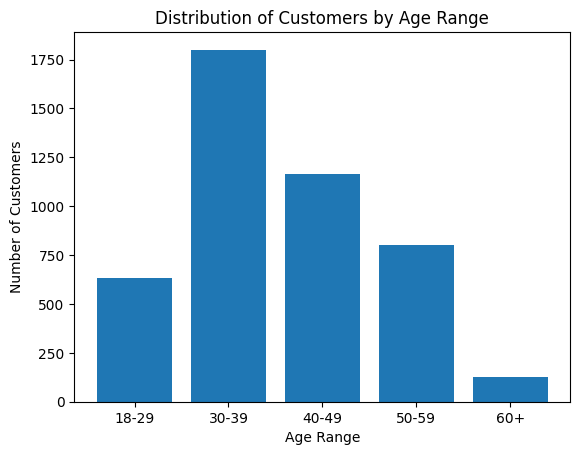

In [104]:

# Define the age ranges
age_ranges = [18, 30, 40, 50, 60, data['age'].max()]

# Bin the age values into the specified ranges
customer_counts = pd.cut(data['age'], bins=age_ranges, labels=['18-29', '30-39', '40-49', '50-59', '60+'])

# Count the number of customers in each age range
customer_counts = customer_counts.value_counts(sort=False)

# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the histogram
ax.bar(customer_counts.index.astype(str), customer_counts.values)

# Set the labels and title
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Customers')
ax.set_title('Distribution of Customers by Age Range')

# Show the plot
plt.show()





#    18. Draw the Stacked Bar Chart of Education vs Purchase



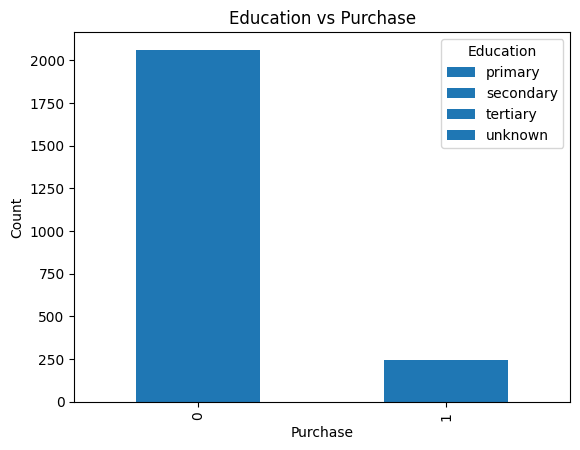

In [105]:

data['y_encoded'] = data['y'].map({'no': 0, 'yes': 1})

# Get the unique education categories
education_categories = data['education'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Iterate over the education categories
for category in education_categories:
    # Subset the data for the current education category
    subset = data[data['education'] == category]

    # Check if there are any records for the current education category
    if subset.shape[0] > 0:
        # Group the subset by the encoded 'y' column and count the occurrences
        counts = subset['y_encoded'].value_counts()

        # Plot the stacked bar chart for the current education category
        counts.plot(kind='bar', stacked=True, ax=ax, label=category)

# Set the labels and title
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.title('Education vs Purchase')

# Add a legend
ax.legend(title='Education')

# Show the plot
plt.show()




#    19. Draw the Bar Chart for the Purchase Frequency for every  Month




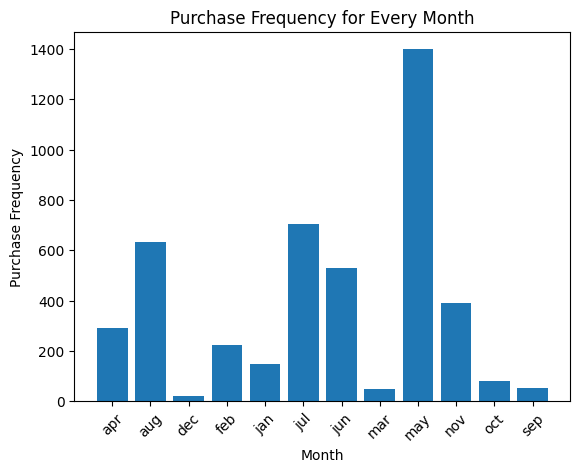

In [108]:

# Group the data by the month and count the occurrences
purchase_frequency = data['month'].value_counts().sort_index()

# Plot the bar chart
plt.bar(purchase_frequency.index, purchase_frequency.values)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Purchase Frequency')
plt.title('Purchase Frequency for Every Month')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()



#    20. Creating a order of months w.r.t to years.



In [116]:
# Extract the year and month from the "month" column
data['year'] = pd.to_datetime(data['month'], format='%b', errors='coerce').dt.year
data['month'] = pd.to_datetime(data['month'], format='%b', errors='coerce').dt.month_name()

# Create an order of months with respect to years
order_of_months = data.groupby(['year', 'month']).size().reset_index().sort_values(['year', 'month'])

print(order_of_months)


     year month     0
0  1900.0   May  1398




#    21. What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?


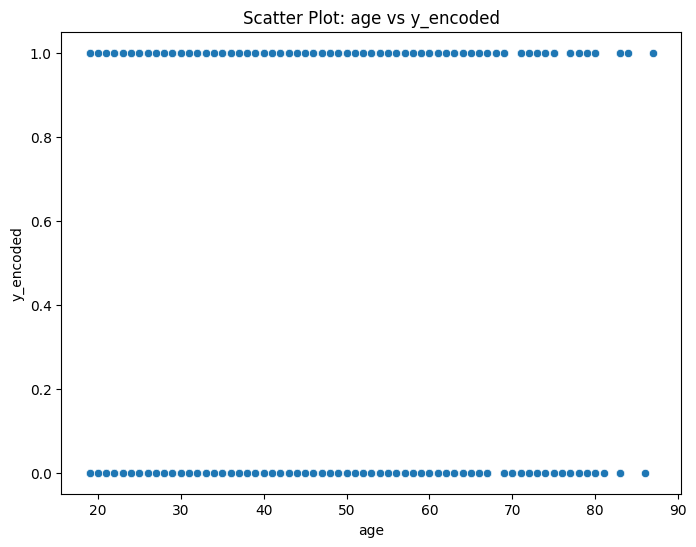

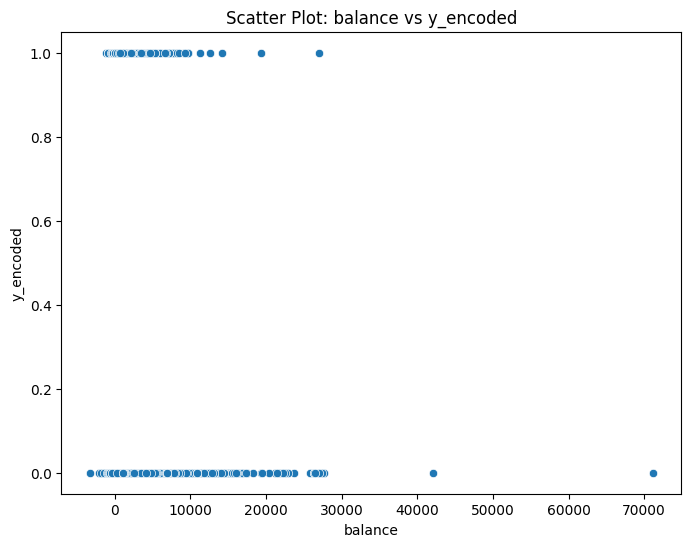

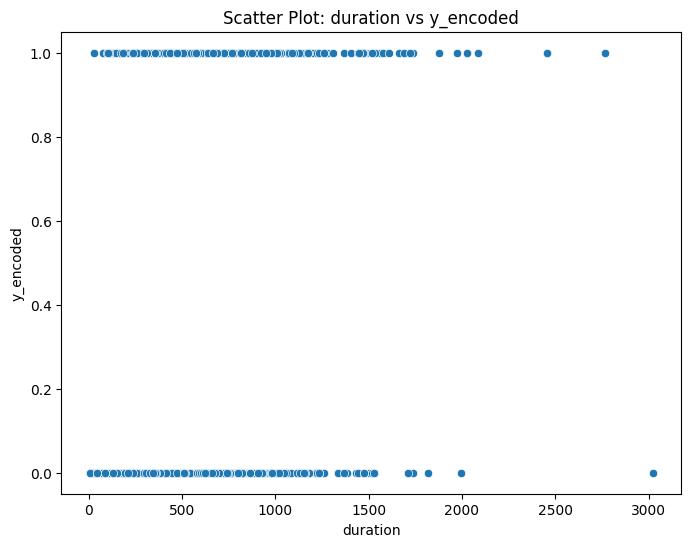

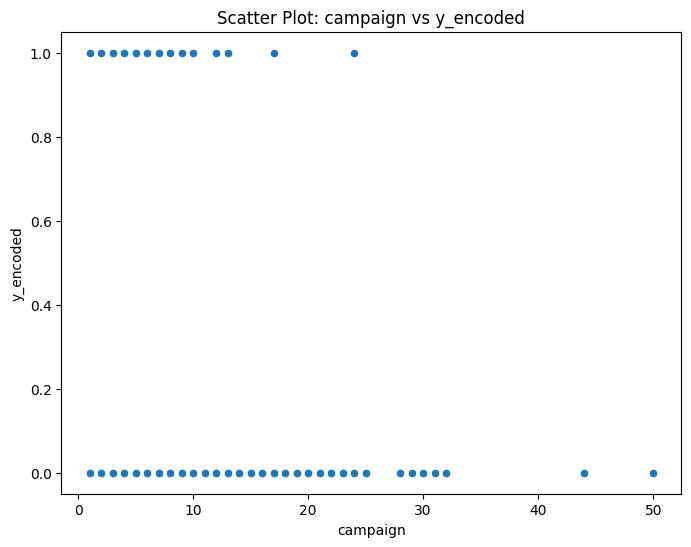

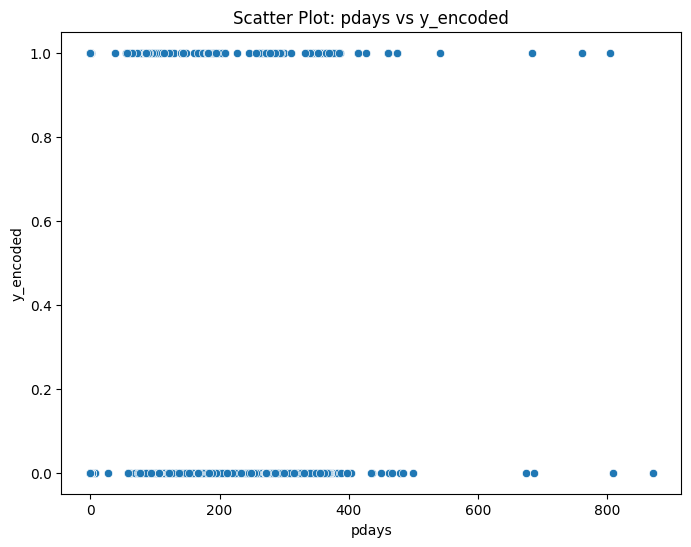

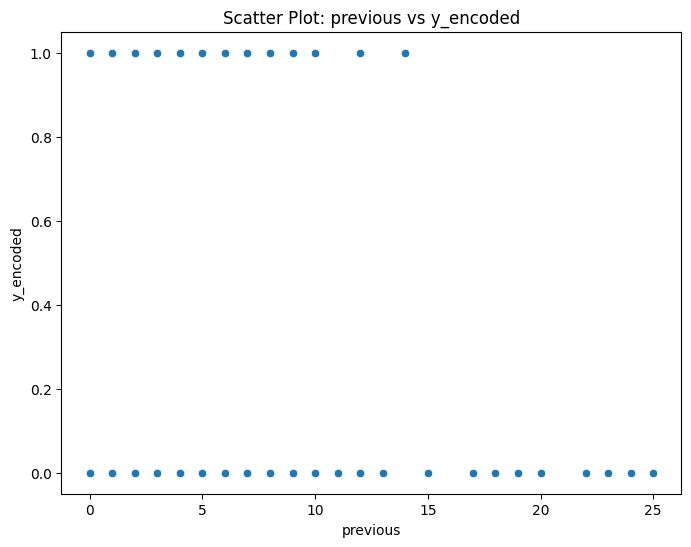

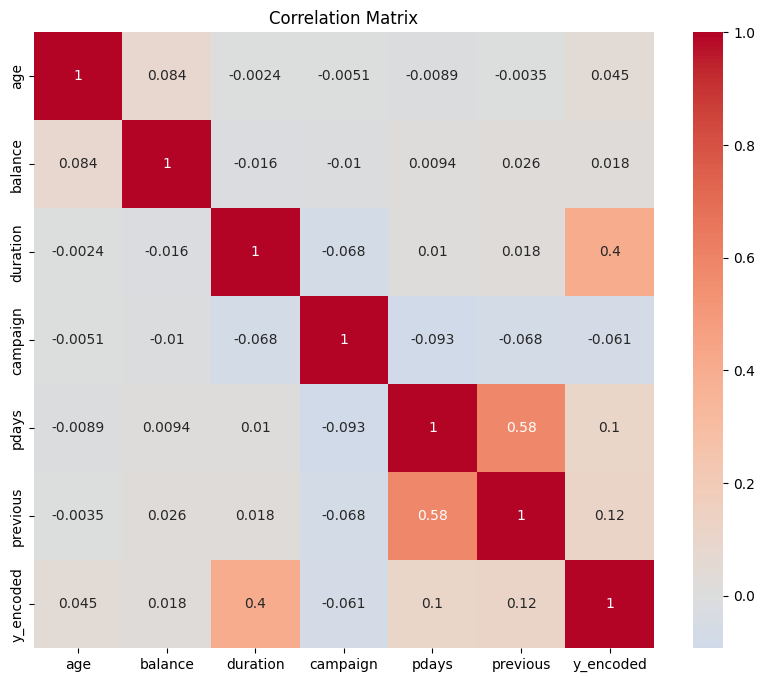

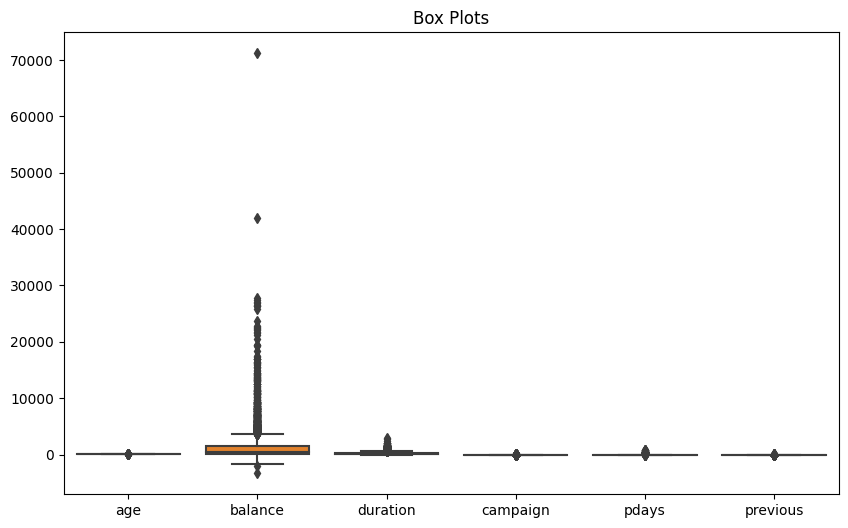

In [117]:

variables_of_interest = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Create scatter plots for each variable against the target variable ('y_encoded')
for variable in variables_of_interest:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=variable, y='y_encoded')
    plt.xlabel(variable)
    plt.ylabel('y_encoded')
    plt.title(f'Scatter Plot: {variable} vs y_encoded')
    plt.show()

# Calculate the correlation matrix
correlation_matrix = data[variables_of_interest + ['y_encoded']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Identify any outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[variables_of_interest])
plt.title('Box Plots')
plt.show()


# 20. Create the ROC curve for both the training and testing dataset.report the area under the curve and attach the plot in your final submission.

In [120]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model object
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the training data
y_train_pred = model.predict(X_train)

# Predict the target variable for the testing data
y_test_pred = model.predict(X_test)


ValueError: ignored

In [121]:

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate the ROC curve for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, label='Testing ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC values
print("AUC for training data:", roc_auc_train)
print("AUC for testing data:", roc_auc_test)


NameError: ignored

#  23. A customer has following charatestics age=32,job =admin ,education=tertiary default=no,balance=10000,housing =no ,loan =yes,contact = cellular,day =10,month =December ,campaign =3,pdays =-1,previous =0.



In [119]:
# Calculate the percentage of customers who accepted the campaign
campaign_acceptance_rate = (data['y'].value_counts(normalize=True) * 100).round(2)
print("Campaign Acceptance Rate:")
print(campaign_acceptance_rate)

# Analyze the relationship between customer demographics and campaign outcome
demographic_variables = ['age', 'job', 'marital', 'education']
for variable in demographic_variables:
    acceptance_rate_by_variable = (data.groupby(variable)['y'].value_counts(normalize=True) * 100).unstack().round(2)
    print(f"\nAcceptance Rate by {variable}:")
    print(acceptance_rate_by_variable)

# Analyze the effectiveness of different contact methods
contact_method_acceptance_rate = (data.groupby('contact')['y'].value_counts(normalize=True) * 100).unstack().round(2)
print("\nAcceptance Rate by Contact Method:")
print(contact_method_acceptance_rate)


Campaign Acceptance Rate:
no     88.48
yes    11.52
Name: y, dtype: float64

Acceptance Rate by age:
y        no     yes
age                
19    50.00   50.00
20    66.67   33.33
21    85.71   14.29
22    66.67   33.33
23    90.00   10.00
..      ...     ...
81   100.00     NaN
83    50.00   50.00
84      NaN  100.00
86   100.00     NaN
87      NaN  100.00

[67 rows x 2 columns]

Acceptance Rate by job:
y                 no    yes
job                        
admin.         87.87  12.13
blue-collar    92.71   7.29
entrepreneur   91.07   8.93
housemaid      87.50  12.50
management     86.48  13.52
retired        76.52  23.48
self-employed  89.07  10.93
services       90.89   9.11
student        77.38  22.62
technician     89.19  10.81
unemployed     89.84  10.16
unknown        81.58  18.42

Acceptance Rate by marital:
y            no    yes
marital               
divorced  85.42  14.58
married   90.10   9.90
single    86.04  13.96

Acceptance Rate by education:
y             no    yes


# 24. Conduct the exploratory data analysis of the data. Identify each of the variable relates with the outcome. for example has the percentage of customer who accepted the campaign increased or decreased. Present your top 3 findings of the data.

In [122]:
# Calculate the percentage of customers who accepted the campaign
campaign_acceptance_rate = (data['y'].value_counts(normalize=True) * 100).round(2)
print("Campaign Acceptance Rate:")
print(campaign_acceptance_rate)

# Analyze the relationship between customer demographics and campaign outcome
demographic_variables = ['age', 'job', 'marital', 'education']
for variable in demographic_variables:
    acceptance_rate_by_variable = (data.groupby(variable)['y'].value_counts(normalize=True) * 100).unstack().round(2)
    print(f"\nAcceptance Rate by {variable}:")
    print(acceptance_rate_by_variable)

# Analyze the effectiveness of different contact methods
contact_method_acceptance_rate = (data.groupby('contact')['y'].value_counts(normalize=True) * 100).unstack().round(2)
print("\nAcceptance Rate by Contact Method:")
print(contact_method_acceptance_rate)


Campaign Acceptance Rate:
no     88.48
yes    11.52
Name: y, dtype: float64

Acceptance Rate by age:
y        no     yes
age                
19    50.00   50.00
20    66.67   33.33
21    85.71   14.29
22    66.67   33.33
23    90.00   10.00
..      ...     ...
81   100.00     NaN
83    50.00   50.00
84      NaN  100.00
86   100.00     NaN
87      NaN  100.00

[67 rows x 2 columns]

Acceptance Rate by job:
y                 no    yes
job                        
admin.         87.87  12.13
blue-collar    92.71   7.29
entrepreneur   91.07   8.93
housemaid      87.50  12.50
management     86.48  13.52
retired        76.52  23.48
self-employed  89.07  10.93
services       90.89   9.11
student        77.38  22.62
technician     89.19  10.81
unemployed     89.84  10.16
unknown        81.58  18.42

Acceptance Rate by marital:
y            no    yes
marital               
divorced  85.42  14.58
married   90.10   9.90
single    86.04  13.96

Acceptance Rate by education:
y             no    yes
